#1주차 과제
- 파이토치 시작하기 및 간단한 

#파이토치 시작하기

파이토치 시작하기

In [ ]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [ ]:
X=torch.randn(4,3)
Y=torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.7681, -0.3293, -1.3846],
         [ 0.0844,  0.2608,  0.8475],
         [ 0.3168, -0.4689, -1.8799],
         [ 1.3577, -0.4571,  2.1010],
         [ 1.0000,  2.0000,  3.0000],
         [ 4.0000,  5.0000,  6.0000],
         [ 7.0000,  8.0000,  9.0000],
         [10.0000, 11.0000, 12.0000]]),
 tensor([[ 0.7681, -0.3293, -1.3846,  1.0000,  2.0000,  3.0000],
         [ 0.0844,  0.2608,  0.8475,  4.0000,  5.0000,  6.0000],
         [ 0.3168, -0.4689, -1.8799,  7.0000,  8.0000,  9.0000],
         [ 1.3577, -0.4571,  2.1010, 10.0000, 11.0000, 12.0000]]))

linear regression implementation from scratch

In [ ]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 686 kB/s 
     |████████████████████████████████| 15.7 MB 56.5 MB/s 
     |████████████████████████████████| 11.2 MB 55.5 MB/s 
     |████████████████████████████████| 9.9 MB 50.2 MB/s 
     |████████████████████████████████| 61 kB 9.8 MB/s 
     |████████████████████████████████| 944 kB 63.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    

In [ ]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [ ]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-2.0594379902, -1.1369819641]) 
label: tensor([1.0334132910])


In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.1006989554, -1.3141132593],
        [ 0.6593064070, -0.1415579915],
        [-0.4919404685, -1.4717345238],
        [ 1.0201729536,  0.6783710718],
        [ 0.8707300425,  0.5142463446],
        [-1.6529405117,  0.1244879961],
        [-0.4264153838,  1.6868281364],
        [-0.9054124355, -0.7142615318],
        [ 1.9582899809, -0.6938307881],
        [ 0.1318535507, -0.2620876729],
        [-0.9260976911, -1.9770048857],
        [ 0.0695408583,  0.5115382075],
        [ 0.1015465409, -0.8862611651],
        [-1.1695837975, -0.5221427679],
        [-0.8937658668,  0.3807642758],
        [ 1.1841677427,  0.5619402528],
        [ 0.3746304810, -1.9538750648],
        [ 0.1442539692,  1.5736587048],
        [ 0.0807325989, -1.0076221228],
        [ 0.5954477787,  0.6311146021]]) 
 tensor([[ 7.7744879723],
        [ 7.6793813705],
        [ 6.2364354134],
        [ 7.5381741524],
        [ 7.3322911263],
        [ 0.3560040593],
        [ 1.6862262487],
        [ 3.8778512478

In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
torch.set_printoptions(precision=10)

In [ ]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [ ]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [ ]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [ ]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss
b_list=[]
w_list=[]

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)
    l.sum().backward()
    sgd([w, b], lr, batch_size)
  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}, b {float(b)}, w{tuple(w)}')
    b_float=b.item()
    b_list.append(b_float)
    w_l=w.tolist()
    w_list.append(w_l)

epoch 1, loss 0.044386, b 5.246920108795166, w(tensor([2.8631327152], requires_grad=True), tensor([-1.4275966883], requires_grad=True))
epoch 2, loss 0.000140, b 5.488286018371582, w(tensor([2.9937605858], requires_grad=True), tensor([-1.4966795444], requires_grad=True))
epoch 3, loss 0.000047, b 5.499393463134766, w(tensor([2.9997770786], requires_grad=True), tensor([-1.5000299215], requires_grad=True))
epoch 4, loss 0.000047, b 5.499807834625244, w(tensor([3.0000023842], requires_grad=True), tensor([-1.5004016161], requires_grad=True))
epoch 5, loss 0.000047, b 5.499847412109375, w(tensor([3.0002057552], requires_grad=True), tensor([-1.5002098083], requires_grad=True))


In [ ]:
b_list

[5.246920108795166,
 5.488286018371582,
 5.499393463134766,
 5.499807834625244,
 5.499847412109375]

In [ ]:
w_list

[[[2.8631327152252197], [-1.4275966882705688]],
 [[2.993760585784912], [-1.4966795444488525]],
 [[2.99977707862854], [-1.5000299215316772]],
 [[3.000002384185791], [-1.5004016160964966]],
 [[3.0002057552337646], [-1.5002098083496094]]]

In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([-0.0002057552,  0.0002098083], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0001525879], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

column2 (feature2)

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

w=-3.0, loss=[11.0893545]
w=-2.7, loss=[10.2793455]
w=-2.4000000000000004, loss=[9.648614]
w=-2.1000000000000005, loss=[9.197114]
w=-1.8000000000000007, loss=[8.924903]
w=-1.5000000000000009, loss=[8.831943]
w=-1.200000000000001, loss=[8.918231]
w=-0.9000000000000012, loss=[9.183756]
w=-0.6000000000000014, loss=[9.628562]
w=-0.3000000000000016, loss=[10.252625]
w=-1.7763568394002505e-15, loss=[11.055944]
w=0.29999999999999805, loss=[12.038516]
w=0.5999999999999979, loss=[13.200345]
w=0.8999999999999977, loss=[14.5414295]
w=1.1999999999999975, loss=[16.061756]
w=1.4999999999999973, loss=[17.761356]
w=1.7999999999999972, loss=[19.640219]
w=2.099999999999997, loss=[21.698307]
w=2.399999999999997, loss=[23.935694]
w=2.6999999999999966, loss=[26.352303]


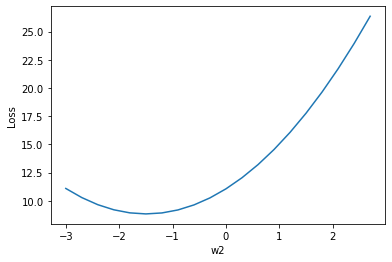

In [ ]:
# our model for the forward pass
def forward(x):
   return x * w2 + 5.5

# Loss function
def loss(x, y):
   y_pred = forward(x)
   return (y_pred - y) * (y_pred - y)

w2_list = []
mse_list = []
for w2 in np.arange(-3.0,3.0,0.3):
   l_sum = 0
   for x_val, y_val in zip(features[:, (1)].detach().numpy(), labels.detach().numpy()):
     n=len(features[:, (1)].detach().numpy())
     y_pred_val = forward(x_val)
     l = loss(x_val, y_val)
     l_sum += l
   w2_list.append(w2)
   mse_list.append(l_sum / n)
   print(f'w={w2}, loss={l_sum/n}')

plt.plot(w2_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w2')
plt.show()


concise implementation of linear regression 
- api 사용해보기

In [ ]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [ ]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [ ]:
next(iter(data_iter))

[tensor([[-0.6689, -0.3901],
         [ 1.3018,  1.0822],
         [-0.2263, -0.3956],
         [ 1.2385,  0.2675],
         [ 0.7361,  0.6439],
         [ 1.4235, -1.8522],
         [ 0.0572,  0.0889],
         [ 0.1844,  0.0278],
         [-0.3302,  0.0547],
         [-0.3448,  0.7105],
         [-0.8079, -0.2088],
         [-0.5050,  0.1590],
         [-0.3555,  0.0908],
         [ 0.7245,  3.3008],
         [-0.4829, -1.0643],
         [ 2.2549,  0.0729],
         [-1.9202,  0.8201],
         [-0.5730, -0.1560],
         [ 2.0282, -1.1173],
         [-0.9984,  0.4895]]), tensor([[ 4.0701],
         [ 7.7854],
         [ 5.4283],
         [ 8.8131],
         [ 6.7449],
         [12.5676],
         [ 5.5261],
         [ 5.9995],
         [ 4.4380],
         [ 3.4057],
         [ 3.3781],
         [ 3.7618],
         [ 4.2935],
         [ 2.7133],
         [ 5.6374],
         [12.1540],
         [-1.4972],
         [ 4.0121],
         [13.2605],
         [ 1.7824]])]

In [ ]:
# `nn` is an abbreviation for neural networks
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [ ]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [ ]:
loss = nn.MSELoss()

Minibatch stochastic gradient descent is a standard tool for optimizing neural networks and thus PyTorch supports it alongside a number of variations on this algorithm in the optim module. When we instantiate an SGD instance, we will specify the parameters to optimize over (obtainable from our net via net.parameters()), with a dictionary of hyperparameters required by our optimization algorithm. 

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [ ]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000263
epoch 2, loss 0.000098
epoch 3, loss 0.000098


In [ ]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0005,  0.0002])
error in estimating b: tensor([-0.0003])
